## Dataset: Iris (붓꽃 자료)

- We then load the Iris data set. There is a bit of preprocessing to do in order to encode the inputs into the amplitudes of a quantum state. In the last preprocessing step, we translate the inputs x to rotation angles using the get_angles function we defined above.

![iris_flower](image/Iris-Dataset-Classification.png)
- image source: https://www.embedded-robotics.com/iris-dataset-classification/

- X variables: [Sepal length, Sepal width, Petal length, Petal width], (각 Sepal: 꽃받침, Petal: 꽃잎 의 가로, 세로 길이)
- Y variable: Species of iris flowers (0:"setosa", 1:"versicolor", 2:"virginica")
- We are trying to classify iris flowers to correct type of iris flowers using the lengths of various parts of the flower.

In [1]:
# !pip install pandas
# !pip install sklearn

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# visualization package
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()  # sample data load

# print(iris)    # pring out data with variable types and its description

In [3]:
print(iris.DESCR)  # Description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

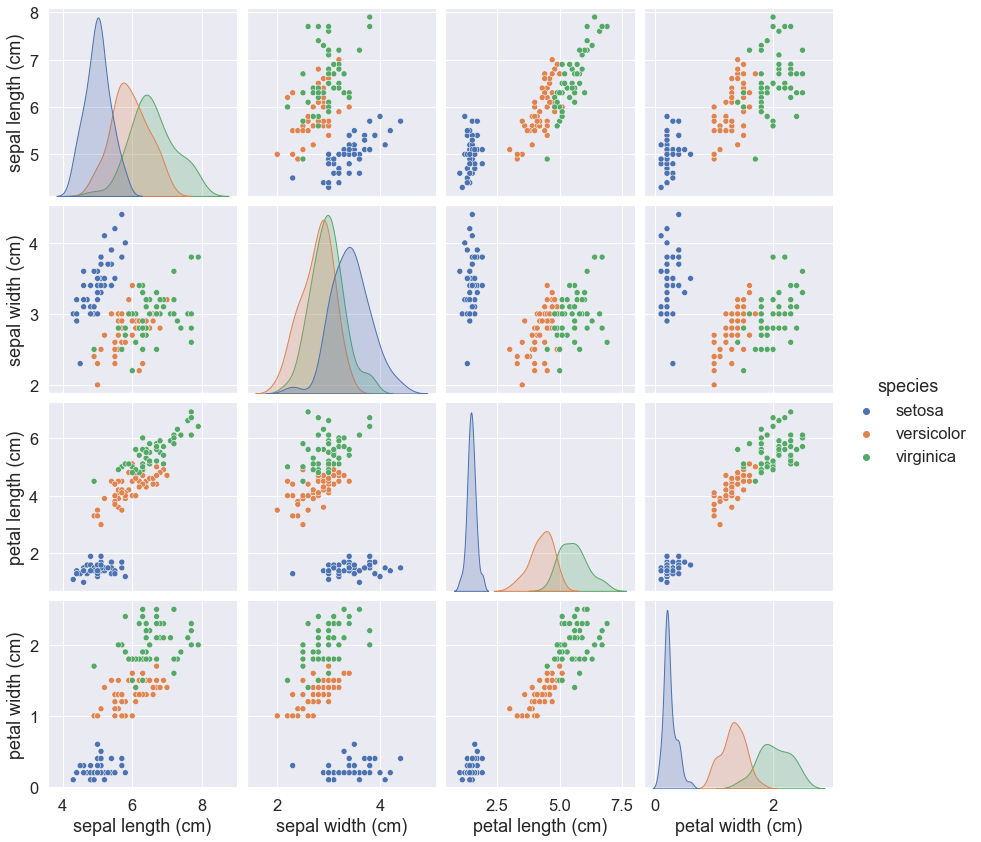

In [4]:
# feature_names(x variables) 와 target(y variable)을 잘 나타내도록 data frame 생성
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# 숫자형으로 기록된 target(y variable) - (0.0, 1.0, 2.0)을 문자형으로 지정
df['species'] = df['species'].map(
    {0: "setosa", 1: "versicolor", 2: "virginica"})
print(df)

# Plot scatter plots and density distribution plots feature-wise WITH any labels
sns.set(font_scale=1.5)
sns.pairplot(df, hue="species", height=3)
plt.show()

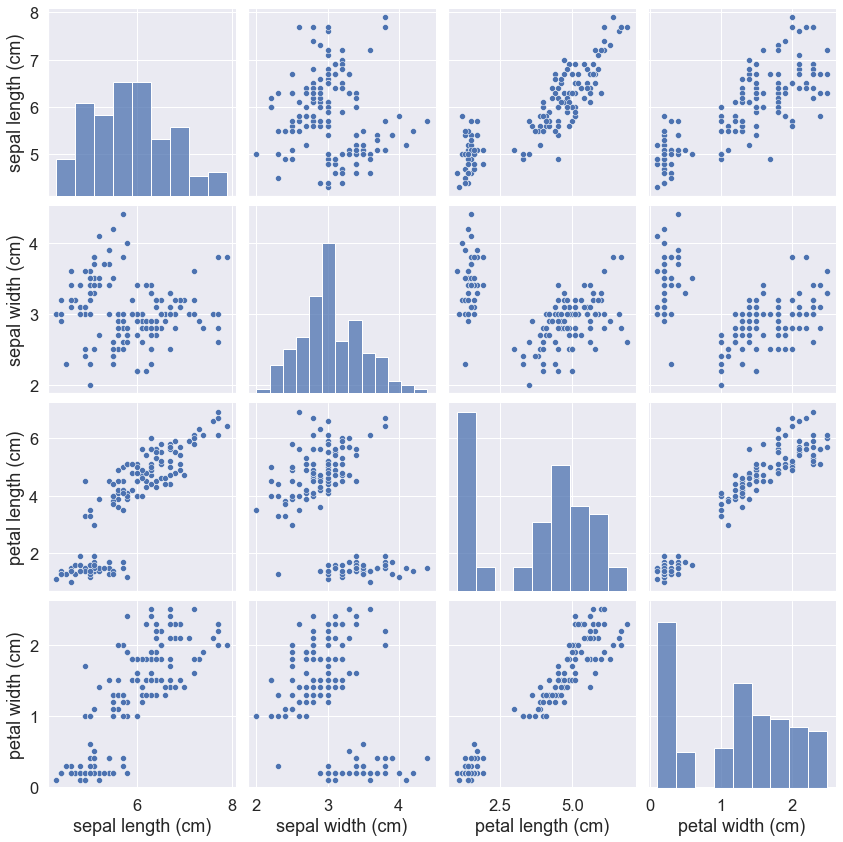

In [5]:
# Plot scatter plots and density distribution plots feature-wise WITHOUT any labels
sns.set(font_scale=1.5)
sns.pairplot(df, height=3)
plt.show()

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

# pd.crosstab(index=df['target'], columns="count")

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df_euclidean_dist = np.linalg.norm(df.iloc[:, 0:4].values, axis=1)
df_euclidean_dist

array([ 6.34507683,  5.91692488,  5.83609458,  5.7497826 ,  6.32139225,
        6.88621812,  5.8966092 ,  6.23297682,  5.45618915,  5.98999165,
        6.71863081,  6.09918027,  5.83180932,  5.35817133,  7.14982517,
        7.36613874,  6.79852925,  6.34901567,  7.06470098,  6.54140658,
        6.60681466,  6.48922183,  5.92958683,  6.32771681,  6.18465844,
        6.04979338,  6.26737585,  6.44825558,  6.37181293,  5.91016074,
        5.93717104,  6.56734345,  6.79043445,  7.06328535,  5.99249531,
        6.05970296,  6.65056389,  6.2401923 ,  5.48543526,  6.31347765,
        6.24739946,  5.22685374,  5.59732079,  6.33798075,  6.64981203,
        5.83866423,  6.56124988,  5.77927331,  6.63852393,  6.15548536,
        9.12633552,  8.58487041,  9.13673902,  7.29588925,  8.5732141 ,
        7.89113427,  8.67352293,  6.45445583,  8.64985549,  7.17635005,
        6.5       ,  7.98122798,  7.60526134,  8.3468557 ,  7.37699126,
        8.70746806,  7.92842986,  7.6642025 ,  8.11048704,  7.35

In [10]:
df['Euclid_dist'] = df_euclidean_dist
df['Euclid_dist_sq'] = df_euclidean_dist**2

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Euclid_dist,Euclid_dist_sq
0,5.1,3.5,1.4,0.2,setosa,6.345077,40.26
1,4.9,3.0,1.4,0.2,setosa,5.916925,35.01
2,4.7,3.2,1.3,0.2,setosa,5.836095,34.06
3,4.6,3.1,1.5,0.2,setosa,5.749783,33.06
4,5.0,3.6,1.4,0.2,setosa,6.321392,39.96
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9.285473,86.22
146,6.3,2.5,5.0,1.9,virginica,8.634234,74.55
147,6.5,3.0,5.2,2.0,virginica,9.071384,82.29
148,6.2,3.4,5.4,2.3,virginica,9.189668,84.45


In [11]:
df[['species', 'Euclid_dist', 'Euclid_dist_sq']]

,species,Euclid_dist,Euclid_dist_sq
0,setosa,6.345077,40.26
1,setosa,5.916925,35.01
2,setosa,5.836095,34.06
3,setosa,5.749783,33.06
4,setosa,6.321392,39.96
...,...,...,...
145,virginica,9.285473,86.22
146,virginica,8.634234,74.55
147,virginica,9.071384,82.29
148,virginica,9.189668,84.45


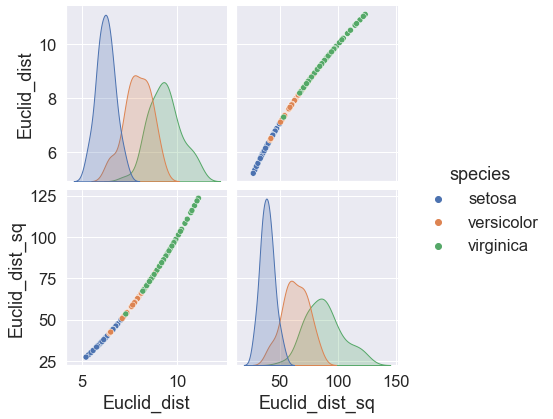

In [12]:
# Plot scatter plots and density distribution plots feature-wise
sns.set(font_scale=1.5)
sns.pairplot(df[['species', 'Euclid_dist', 'Euclid_dist_sq']],
             hue="species", height=3)
plt.show()

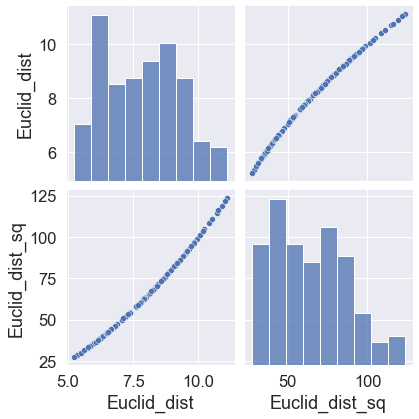

In [13]:
# Plot scatter plots and density distribution plots feature-wise
sns.set(font_scale=1.5)
sns.pairplot(df[['species', 'Euclid_dist', 'Euclid_dist_sq']], height=3)
plt.show()

## K-means Clustering

- K-means Clustering is an iterative algorithm that updates the $k$ centoids and reassign the data points to a new cluster by finding the shortest distance between the datapoint and each centorids.

- [k-means cluster with iris data](https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset)

In [14]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [15]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
x = df.iloc[:, 0:4]

x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


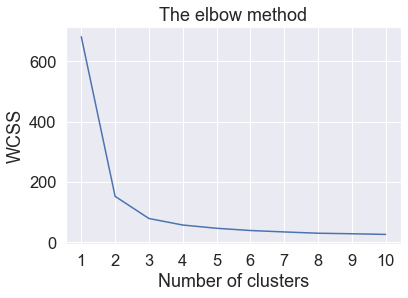

In [17]:
plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, step=1))  # Set label locations.
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

In [18]:
num_cluster = 3

kmeans = KMeans(n_clusters=num_cluster, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [19]:
x.iloc[0:10, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [20]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

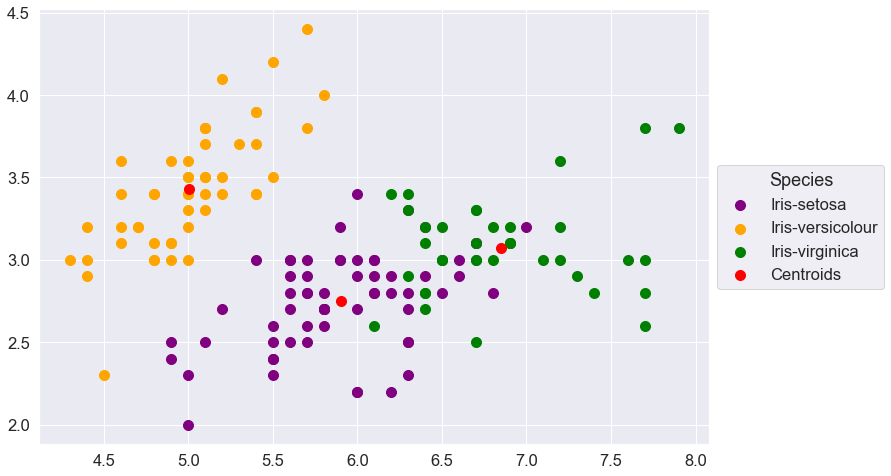

In [21]:
# Visualising the clusters
plt.figure(figsize=(12, 8))
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans ==
            0, 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1],
            s=100, c='orange', label='Iris-versicolour')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2,
            1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.legend(title="Species",  loc='center left', bbox_to_anchor=(1, 0.5))

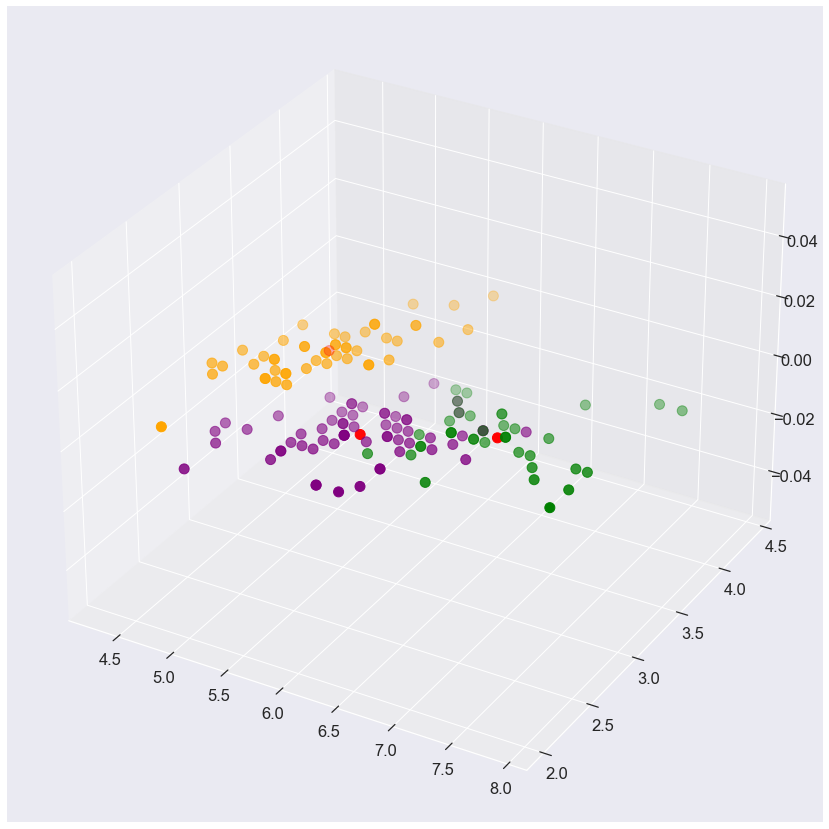

In [22]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans ==
            0, 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1],
            s=100, c='orange', label='Iris-versicolour')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2,
            1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='red', label='Centroids')
plt.show()

- [K-Means Clustering with Python code](https://zephyrus1111.tistory.com/179)

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(100)
num_data = 50

x11 = np.linspace(0.3, 0.7, 20)
x12 = np.linspace(1.3, 1.8, 15)
x13 = np.linspace(2.4, 3, 15)
x1 = np.concatenate((x11, x12, x13), axis=None)
error = np.random.normal(1, 0.5, num_data)
x2 = 1.5*x1+2+error

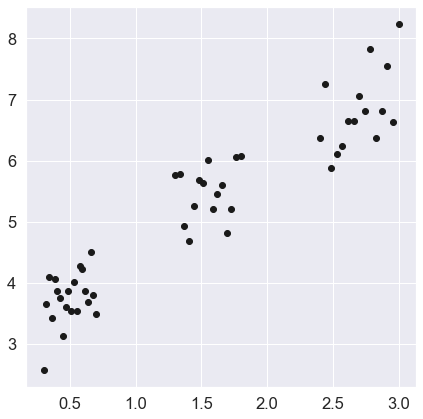

In [24]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.show()

In [25]:
def kmeans_clustering(X, n_clusters, init_center=None, max_iter=10, epsilon=1e-4, random_state=100):
    # inititalize centeroids
    if init_center is None:
        random.seed(random_state)
        idx = random.sample(range(X.shape[0]), n_clusters)
        center = X[idx, :]
    else:
        center = init_center
    iteration = 1

    labels_history = []  # label history
    center_history = []  # centeroid history
    while(iteration <= max_iter):
        # assign label
        labels = []
        for i in range(X.shape[0]):
            data = X[i, :]
            labels.append(np.argmin([np.linalg.norm(data-x) for x in center]))

        labels = np.array(labels)
        # update centeroids
        next_center = []
        for i in range(n_clusters):
            target_idx = np.where(labels == i)[0]
            center_val = np.mean(X[target_idx, :], axis=0)
            next_center.append(center_val)

        next_center = np.array(next_center)
        if epsilon:
            if np.linalg.norm(next_center-center) <= epsilon:
                break
        center = next_center
        labels_history.append(labels)
        center_history.append(center)
        iteration += 1
    return (labels, iteration, labels_history, center_history)

In [26]:
X = np.stack([x1, x2], axis=1)

init_center = np.array([[2, 4], [1, 5], [2.5, 6]])
max_iter = 50
epsilon = 1e-10
random_state = 101
n_clusters = 3
results = kmeans_clustering(X, n_clusters, init_center, max_iter, epsilon=1e-4,
                            random_state=100)
labels = results[0]

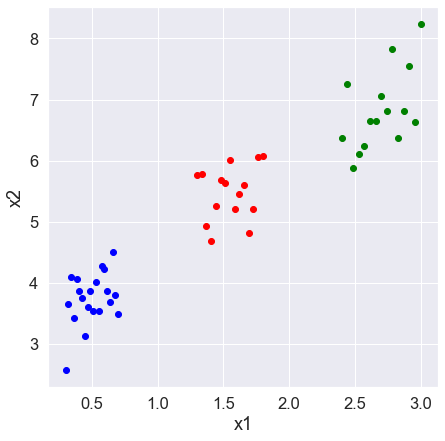

In [27]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
for i, label in enumerate(labels):
    if label == 0:
        color = 'blue'
    elif label == 1:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[i, 0], X[i, 1], color=color)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

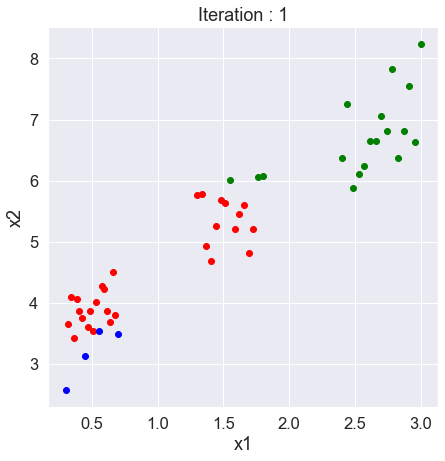

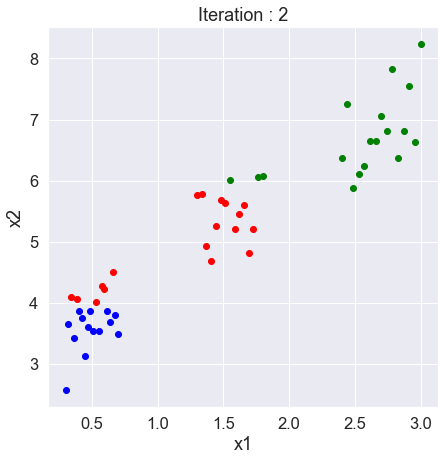

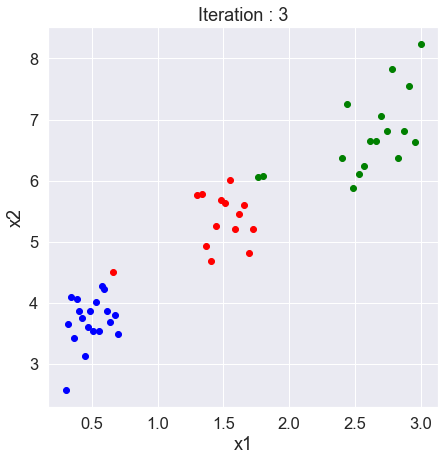

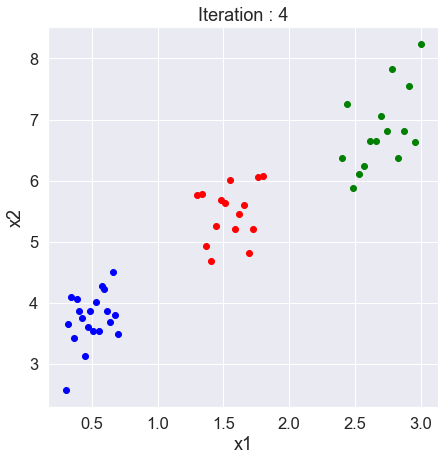

In [28]:
labels_history = results[2]
for j, labels in enumerate(labels_history):
    fig = plt.figure(figsize=(7, 7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'blue'
        elif label == 1:
            color = 'red'
        else:
            color = 'green'
        plt.scatter(X[i, 0], X[i, 1], color=color)
    plt.title(f'Iteration : {j+1}')
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.show()

- Scikit-Learn package 이용

In [29]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters=3, init=init_center)
kmeans.fit(X)
labels = kmeans.labels_

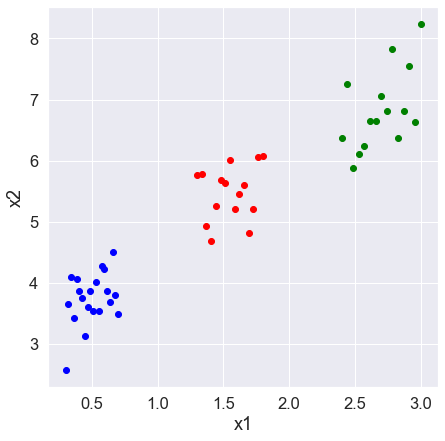

In [30]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
for i, label in enumerate(labels):
    if label == 0:
        color = 'blue'
    elif label == 1:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[i, 0], X[i, 1], color=color)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Silhoutte Score

- [Wikipedia: Siloutte (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [Silhoutte Score with Python code](https://zephyrus1111.tistory.com/193)


- 군집의 개수를 판단하는데 사용할 수 있다.
- 클러스터링의 평가 결과를 시각적으로 나타낼 수 있다.

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

np.random.seed(100)
num_data = 50

x11 = np.linspace(0.3, 0.7, 20)
x12 = np.linspace(1.3, 1.8, 15)
x13 = np.linspace(2.4, 3, 15)
x1 = np.concatenate((x11, x12, x13), axis=None)
error = np.random.normal(1, 0.5, num_data)
x2 = 1.5*x1+2+error

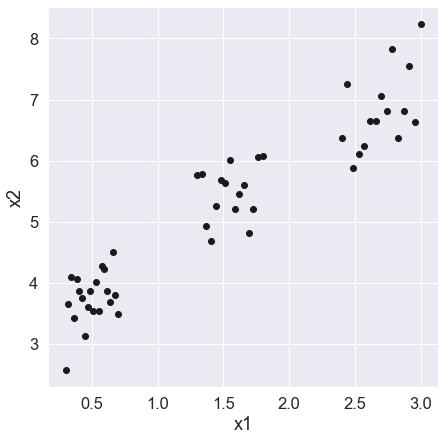

In [32]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [33]:
X = np.stack([x1, x2], axis=1)
init = np.array([[2., 4.], [1., 5.], [2.5, 6.]])

kmeans = KMeans(n_clusters=3, init=init)
kmeans.fit(X)
labels = kmeans.labels_

In [34]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res

    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]

        # calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels == target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)

        # calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels == ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)

        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)

    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean(
            [s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)

    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [35]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7434423527756951


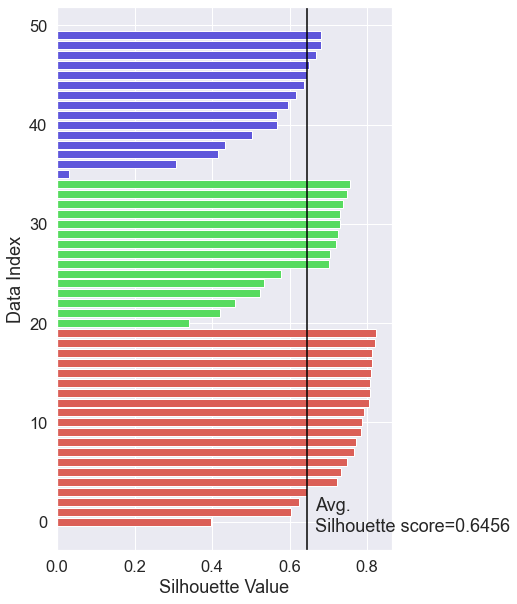

In [36]:
import seaborn as sns

# 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels == ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)

colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]

fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)),
         sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.axvline(x = np.mean(sorted_cluster_svl), color = 'black', label = 'avg. Silhouette score')
plt.text(np.mean(sorted_cluster_svl)+0.02, -1, 'Avg. \nSilhouette score='+str(round(np.mean(sorted_cluster_svl),4)))
plt.show()

- Scikit-Learn, Yellowbrick package 이용

- [K-Means Elbow Method and Silhouette Analysis with Yellowbrick and Scikit-Learn](https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/)
- [Yellowbrick - Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

In [37]:
# !pip install yellowbrick

In [38]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

iris = load_iris()

In [39]:
# displays ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris['feature_names'])
# displays array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
print(iris['target_names'])

X = iris['data']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


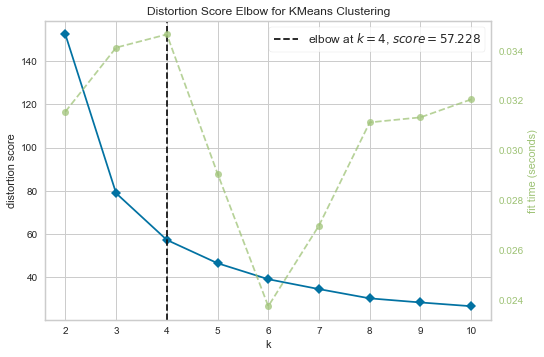

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2, 11))
elb_visualizer.fit(X)
elb_visualizer.show()

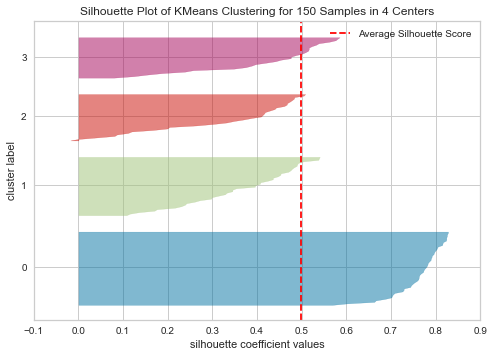

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
model_4clust = KMeans(n_clusters=4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust, colors='yellowbrick')
sil_visualizer.fit(X)
sil_visualizer.show()

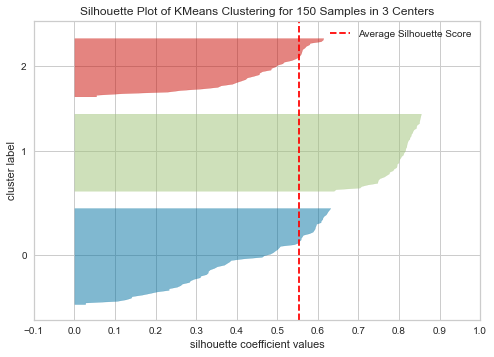

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model_3clust = KMeans(n_clusters=3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust, colors='yellowbrick')
sil_visualizer.fit(X)
sil_visualizer.show()

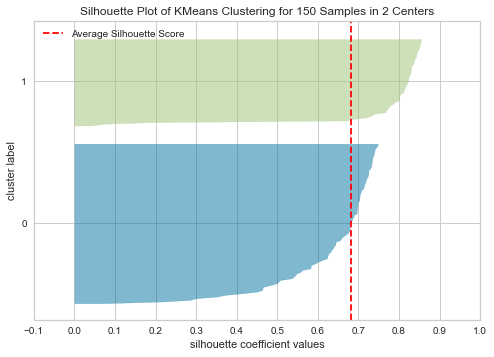

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model_3clust = KMeans(n_clusters=2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust, colors='yellowbrick')
sil_visualizer.fit(X)
sil_visualizer.show()

In [44]:
sil_visualizer.fit(X)

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

## Dunn Index

- [Wikipedia: Dunn Index](https://en.wikipedia.org/wiki/Dunn_index)
- [Dunn Index with Python code](https://zephyrus1111.tistory.com/180)

### Code with example

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

from itertools import combinations

np.random.seed(100)
num_data = 20

x1 = np.linspace(0.3, 0.7, num_data)
error = np.random.normal(1, 0.5, num_data)
x2 = 1.5*x1+2+error

X = np.stack([x1, x2], axis=1)
X

array([[0.3       , 2.57511726],
       [0.32105263, 3.65291915],
       [0.34210526, 4.0896758 ],
       [0.36315789, 3.41851882],
       [0.38421053, 4.06697618],
       [0.40526316, 3.86500416],
       [0.42631579, 3.75006352],
       [0.44736842, 3.13603097],
       [0.46842105, 3.60788366],
       [0.48947368, 3.86171125],
       [0.51052632, 3.53677598],
       [0.53157895, 4.01495017],
       [0.55263158, 3.53714984],
       [0.57368421, 4.26894985],
       [0.59473684, 4.22846567],
       [0.61578947, 3.87147864],
       [0.63684211, 3.68962297],
       [0.65789474, 4.50170845],
       [0.67894737, 3.79935324],
       [0.7       , 3.49084088]])

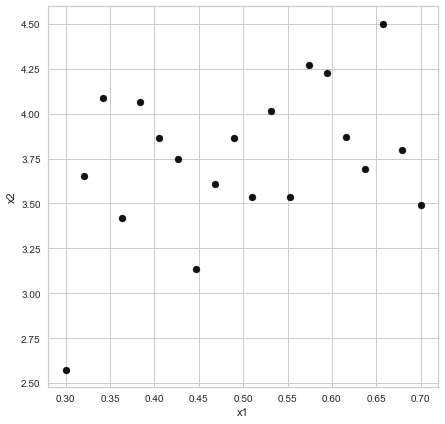

In [46]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 클러스터 내 거리 측도 Intra-Cluster distance measure
- a. Complete Diameter Distance: This function below calculates the maximum distance between two points within the cluster. (This version was proposed by Dunn).

In [47]:
def complete_diameter_distance(X):
    res = []
    for i, j in combinations(range(X.shape[0]), 2):
        a_i = X[i, :]
        a_j = X[j, :]
        res.append(np.linalg.norm(a_i-a_j))

    return np.max(res)

In [48]:
complete_diameter_distance(X)

1.9595515390777758

- b. Average Diamiter Distance: This function calculates the mean distance between all pairs within the same cluster.

In [49]:
def average_diameter_distance(X):
    res = []
    for i, j in combinations(range(X.shape[0]), 2):
        a_i = X[i, :]
        a_j = X[j, :]
        res.append(np.linalg.norm(a_i-a_j))

    return np.mean(res)

In [50]:
average_diameter_distance(X)

0.5159584769337329

- c. Average Diamiter Distance: This function calculates distance of all the points from the mean within the cluster.

In [51]:
def centroid_diameter_distance(X):
    center = np.mean(X, axis=0)
    res = 2*np.mean([np.linalg.norm(x-center) for x in X])

    return res

In [52]:
centroid_diameter_distance(X)

0.6874635793987067

#### 클러스터 간 거리 측도 Inter-Cluster distance measure
- a. Single Linkage Distance: This function below calculates the minimum distance between clusters.

In [53]:
np.random.seed(100)

x11 = np.linspace(0.3, 0.7, 20)
label1 = [0]*len(x11)
x12 = np.linspace(1.3, 1.8, 15)
label2 = [1]*len(x12)
error = np.random.normal(1, 0.5, 35)
x1 = np.concatenate((x11, x12), axis=None)
x2 = 1.5*x1+2+error
labels = label1+label2

X = np.stack((x1, x2), axis=1)

labels = np.array(labels)
X1 = X[np.where(labels == 0)[0], :]
X2 = X[np.where(labels == 1)[0], :]

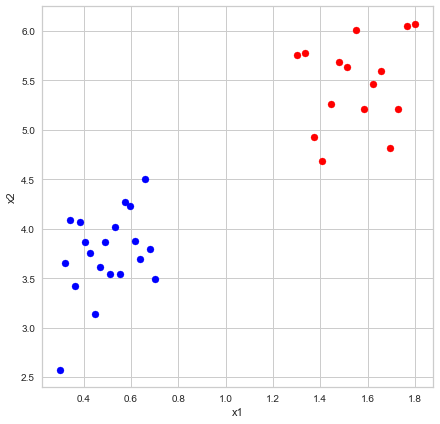

In [54]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
for i, x in enumerate(X):
    if labels[i] == 0:
        plt.scatter(x[0], x[1], color='blue')
    else:
        plt.scatter(x[0], x[1], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [55]:
def single_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.min(res)

In [56]:
single_linkage_distance(X1, X2)

0.7724228550378145

- b. Complete Linkage Distance: This function below calculates the maximum distance between clusters.

In [57]:
def complete_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.max(res)

In [58]:
complete_linkage_distance(X1, X2)

3.807983171195838

- c. Average Linkage Distance: This function below calculates the minimum distance between clusters.

In [59]:
def average_linkage_distance(X1, X2):
    res = []
    for x1 in X1:
        for x2 in X2:
            res.append(np.linalg.norm(x1-x2))
    return np.mean(res)

In [60]:
average_linkage_distance(X1, X2)

2.0502961616379003

- d. Centroid Linkage Distance: This function below calculates distance between centoids of two clusters.

In [61]:
def centroid_linkage_distance(X1, X2):
    center1 = np.mean(X1, axis=0)
    center2 = np.mean(X2, axis=0)
    return np.linalg.norm(center1-center2)

In [62]:
centroid_linkage_distance(X1, X2)

2.023846293346597

- e. Average of Centroids Linkage Distance: This function below calculates average value of the distances between a centroid from one cluster and the data points from other clusters.

In [63]:
def average_of_centroids_linkage_distance(X1, X2):
    center1 = np.mean(X1, axis=0)
    center2 = np.mean(X2, axis=0)
    res = []
    for x1 in X1:
        res.append(np.linalg.norm(x1-center2))
    for x2 in X2:
        res.append(np.linalg.norm(x2-center1))

    return np.mean(res)

In [64]:
average_of_centroids_linkage_distance(X1, X2)

2.035733790732974

### Dunn Index 파이썬 구현

In [65]:
np.random.seed(100)
num_data = 50

x11 = np.linspace(0.3, 0.7, 20)
label1 = [0]*len(x11)
x12 = np.linspace(1.3, 1.8, 15)
label2 = [1]*len(x12)
x13 = np.linspace(2.4, 3, 15)
label3 = [2]*len(x13)
x1 = np.concatenate((x11, x12, x13), axis=None)
error = np.random.normal(1, 0.5, num_data)
x2 = 1.5*x1+2+error

X = np.stack((x1, x2), axis=1)
labels = np.array(label1+label2+label3)

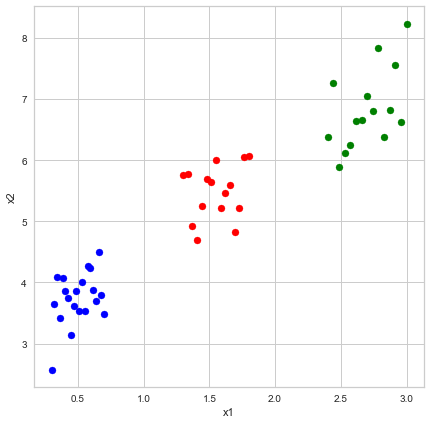

In [66]:
fig = plt.figure(figsize=(7, 7))
fig.set_facecolor('white')
for i, x in enumerate(X):
    if labels[i] == 0:
        plt.scatter(x[0], x[1], color='blue')
    elif labels[i] == 1:
        plt.scatter(x[0], x[1], color='red')
    else:
        plt.scatter(x[0], x[1], color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [67]:
def Dunn_index(X, labels, intra_cluster_distance_type, inter_cluster_distance_type):
    intra_cdt_dict = {
        'cmpl_dd': complete_diameter_distance,
        'avdd': average_diameter_distance,
        'cent_dd': centroid_diameter_distance
    }
    inter_cdt_dict = {
        'sld': single_linkage_distance,
        'cmpl_ld': complete_linkage_distance,
        'avld': average_linkage_distance,
        'cent_ld': centroid_linkage_distance,
        'av_cent_ld': average_of_centroids_linkage_distance
    }
    # intra cluster distance
    intra_cluster_distance = intra_cdt_dict[intra_cluster_distance_type]

    # inter cluster distance
    inter_cluster_distance = inter_cdt_dict[inter_cluster_distance_type]

    # get minimum value of inter_cluster_distance
    res1 = []
    for i, j in combinations(np.unique(labels), 2):
        X1 = X[np.where(labels == i)[0], :]
        X2 = X[np.where(labels == j)[0], :]
        res1.append(inter_cluster_distance(X1, X2))
    min_inter_cd = np.min(res1)

    # get maximum value of intra_cluser_distance

    res2 = []
    for label in np.unique(labels):
        X_target = X[np.where(labels == label)[0], :]
        if X_target.shape[0] >= 2:
            res2.append(intra_cluster_distance(X_target))
        else:
            res2.append(0)
    max_intra_cd = np.max(res2)

    Dunn_idx = min_inter_cd/max_intra_cd
    return Dunn_idx

In [68]:
intra_cluster_distance_type = ['cmpl_dd', 'avdd', 'cent_dd']
inter_cluster_distance_type = ['sld', 'cmpl_ld', 'avld', 'cent_ld', 'av_cent_ld']

for i in range(len(intra_cluster_distance_type)):
    for j in range(len(inter_cluster_distance_type)):
        print("Dunn Index:", "Intra Cluster Dist.:", '%-10s' % intra_cluster_distance_type[i],
              "Inter Cluster Dist.:", '%-12s' % inter_cluster_distance_type[j],
              "Dunn Index Valule:", Dunn_index(X, labels, intra_cluster_distance_type[i], inter_cluster_distance_type[j]))

Dunn Index: Intra Cluster Dist.: cmpl_dd    Inter Cluster Dist.: sld          Dunn Index Valule: 0.2780279425885912
Dunn Index: Intra Cluster Dist.: cmpl_dd    Inter Cluster Dist.: cmpl_ld      Dunn Index Valule: 1.5816104606529293
Dunn Index: Intra Cluster Dist.: cmpl_dd    Inter Cluster Dist.: avld         Dunn Index Valule: 0.7627361333011984
Dunn Index: Intra Cluster Dist.: cmpl_dd    Inter Cluster Dist.: cent_ld      Dunn Index Valule: 0.7374610426286897
Dunn Index: Intra Cluster Dist.: cmpl_dd    Inter Cluster Dist.: av_cent_ld   Dunn Index Valule: 0.7486880384584048
Dunn Index: Intra Cluster Dist.: avdd       Inter Cluster Dist.: sld          Dunn Index Valule: 0.8233205335652861
Dunn Index: Intra Cluster Dist.: avdd       Inter Cluster Dist.: cmpl_ld      Dunn Index Valule: 4.683602504961463
Dunn Index: Intra Cluster Dist.: avdd       Inter Cluster Dist.: avld         Dunn Index Valule: 2.2586806002025015
Dunn Index: Intra Cluster Dist.: avdd       Inter Cluster Dist.: cent_ld 

In [69]:
import random
import pandas as pd

# 빈 DataFrame 생성하기
Dunn_Index_result = pd.DataFrame(columns=['intra cluster', 'inter cluster', 'Dunn index'])
Dunn_Index_result

,intra cluster,inter cluster,Dunn index


In [70]:
len(inter_cluster_distance_type)

5

In [71]:
inter_cluster_distance_type[j]

'av_cent_ld'

In [72]:
for i in range(len(intra_cluster_distance_type)):
    for j in range(len(inter_cluster_distance_type)):
        Dunn_Index_result.loc[len(inter_cluster_distance_type)*i+j, 'intra cluster'] = intra_cluster_distance_type[i]
        Dunn_Index_result.loc[len(inter_cluster_distance_type)*i+j, 'inter cluster'] = inter_cluster_distance_type[j]
        Dunn_Index_result.loc[len(inter_cluster_distance_type)*i+j, 'Dunn index'] = Dunn_index(X, labels, intra_cluster_distance_type[i], inter_cluster_distance_type[j])

Dunn_Index_result

,intra cluster,inter cluster,Dunn index
0,cmpl_dd,sld,0.278028
1,cmpl_dd,cmpl_ld,1.58161
2,cmpl_dd,avld,0.762736
3,cmpl_dd,cent_ld,0.737461
4,cmpl_dd,av_cent_ld,0.748688
5,avdd,sld,0.823321
6,avdd,cmpl_ld,4.683603
7,avdd,avld,2.258681
8,avdd,cent_ld,2.183834
9,avdd,av_cent_ld,2.21708


In [73]:
Dunn_Index_result[Dunn_Index_result['Dunn index']== Dunn_Index_result['Dunn index'].max()]

,intra cluster,inter cluster,Dunn index
6,avdd,cmpl_ld,4.683603
